# Palmer Penguins
***
<div style="clip-path: inset(15% 0% 5% 0%); width: 100%; height: auto;">
    <img src="https://lauranavarroviz.files.wordpress.com/2020/08/penguinsbill_plot_final.png" style="width: 80%;">
</div>


This notebook contains my analysis of the famos palmer penguins dataset.

The dataset aviable [on Github](https://github.com/ShamansIT/Data_Analytics_Research_Project).

## Imports
***
Use pandas for the DataFrame data structure. 

It allows us to investigate CSV files amongst amongst other features!


In [272]:
#Data frames import
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import andrews_curves

## Load Data
***
Load the palmer penguins data set from a URL.

In [273]:
#Loads the pinguins dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [274]:
#First look for import data
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Palmer Penguins
***
<div style="clip-path: inset(15% 0% 5% 0%); width: 100%; height: auto;">
    <img src="https://lauranavarroviz.files.wordpress.com/2020/08/penguinsbill_plot_final.png" style="width: 80%;">
</div>


This notebook contains my analysis of the famos palmer penguins dataset.

The dataset aviable [on Github](https://github.com/ShamansIT/Data_Analytics_Research_Project).

## Inspect Data
***

In [275]:
#Look at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [276]:
#Sex of penguins
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [277]:
#Count a number of penguins each of sex
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [278]:
#Describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [279]:
# All data inspection head
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [280]:
# Print data info for future modeling data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Data modeling
***

In [281]:
# Print Species unique value
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [282]:
# Species object modify to category
df['species'] = df['species'].astype('category')

In [283]:
# Show Species category
df['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [284]:
# Print Island unique value
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [285]:
# Island object modify to category
df['island'] = df['island'].astype('category')

In [286]:
# Show Island category
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: category
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [287]:
# Print Sex unique value
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [288]:
# Sex object modify to category
df['sex'] = df['sex'].astype('category')

In [289]:
# Show Sex category
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: category
Categories (2, object): ['FEMALE', 'MALE']

In [290]:
# Show all data after modify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [291]:
# Renaming columns
df.rename(columns={
    'species' : "Species",
    'island' : "Island",
    'bill_length_mm': 'Bill Length (mm)',
    'bill_depth_mm': 'Bill Depth (mm)',
    'flipper_length_mm': 'Flipper Length (mm)',
    'body_mass_g': 'Body Mass (g)',
    'sex': 'Sex'
}, inplace=True)

In [292]:
# Show
df.head()

,Species,Island,Bill Length (mm),Bill Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Missing data
---


In [293]:
# Show missing 
df.isnull().sum()

Species                 0
Island                  0
Bill Length (mm)        2
Bill Depth (mm)         2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
dtype: int64

In [294]:
# Show all data missing rows
df[df.isnull().any(axis=1)]

,Species,Island,Bill Length (mm),Bill Depth (mm),Flipper Length (mm),Body Mass (g),Sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


There are 10 rows that contain missing values, constituting less 3% of the dataset. These rows will be excluded from the analysis.

In [295]:
# Drop all rows with missing data
df.dropna(inplace=True)

## Bill dimensions Tables
***

In [296]:
def penguin_sum_table_model (group_cols, value_cols):
    return df.groupby(group_cols)[value_cols].mean().round(2)

In [297]:
# Generate a summary table
sum_table = penguin_sum_table_model(["Species","Sex"], ["Bill Length (mm)", "Bill Depth (mm)"])
	

In [298]:
# Show summary table
sum_table

Bill Length (mm)  Bill Depth (mm)
Species   Sex                                      
Adelie    FEMALE             37.26            17.62
          MALE               40.39            19.07
Chinstrap FEMALE             46.57            17.59
          MALE               51.09            19.25
Gentoo    FEMALE             45.56            14.24
          MALE               49.47            15.72

## Species size Table
***

In [299]:
# Create pivot table(pandas)
pivot_size_table = pd.pivot_table(df,values= ['Body Mass (g)', 'Flipper Length (mm)'], index='Species', aggfunc='mean')

In [300]:
# Show table
pivot_size_table.round(1)

,Body Mass (g),Flipper Length (mm)
Species,,
Adelie,3706.2,190.1
Chinstrap,3733.1,195.8
Gentoo,5092.4,217.2


# Plot Section

## Body Mass, Grouped by Species and Sex
***

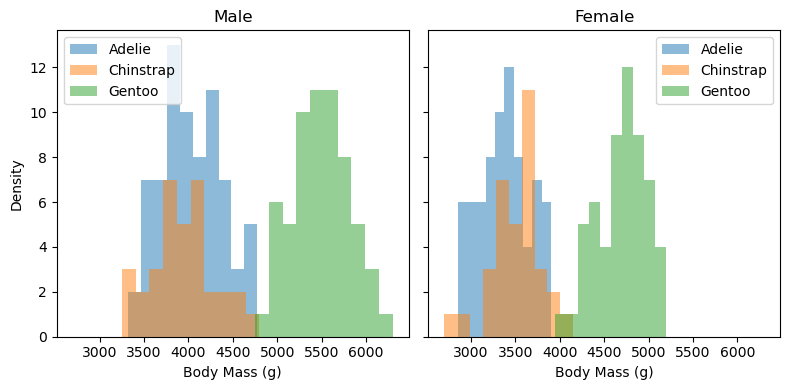

In [301]:
#Create figure of 2 subplots, each of which share the same x and y axes
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex = True, sharey = True)
species = df['Species'].unique()

#Loop through species
for penguin in species:
    #Create a mask for male penguin
    male_mask = (df["Species"] == penguin) & (df["Sex"] == "MALE")
    
    #Create a mask for female penguin
    female_mask = (df["Species"] == penguin) & (df["Sex"] == "FEMALE")
    
    #Histogram of male Body Mass
    ax[0].hist(df[male_mask]["Body Mass (g)"],
            label = penguin,
            alpha = 0.5)
    
    #Histogram of female Body Mass
    ax[1].hist(df[female_mask]["Body Mass (g)"],
            label = penguin,
            alpha = 0.5)

#Set titles, xlabels, and ylabel
ax[0].set(title = "Male",
          xlabel = "Body Mass (g)",
          ylabel = "Density")
ax[1].set(title = "Female",
          xlabel = "Body Mass (g)",)

#Display legends and use tight_layout
ax[0].legend(), ax[1].legend()
plt.tight_layout()

## Number of individuals by species per island
***

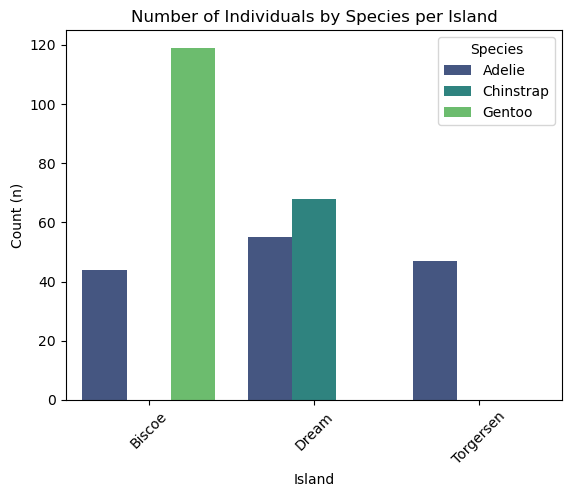

In [302]:
# Creating the plot with a specific figure size to accommodate island names
ax = sns.countplot(x='Island', hue='Species', data=df, palette='viridis')
plt.title('Number of Individuals by Species per Island')
plt.xlabel('Island')
plt.ylabel('Count (n)')
plt.xticks(rotation=45)
plt.legend(title='Species')

# Show
plt.show()

## Body Mass per Flipper Size
***

c:\Users\Serhii\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Serhii\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


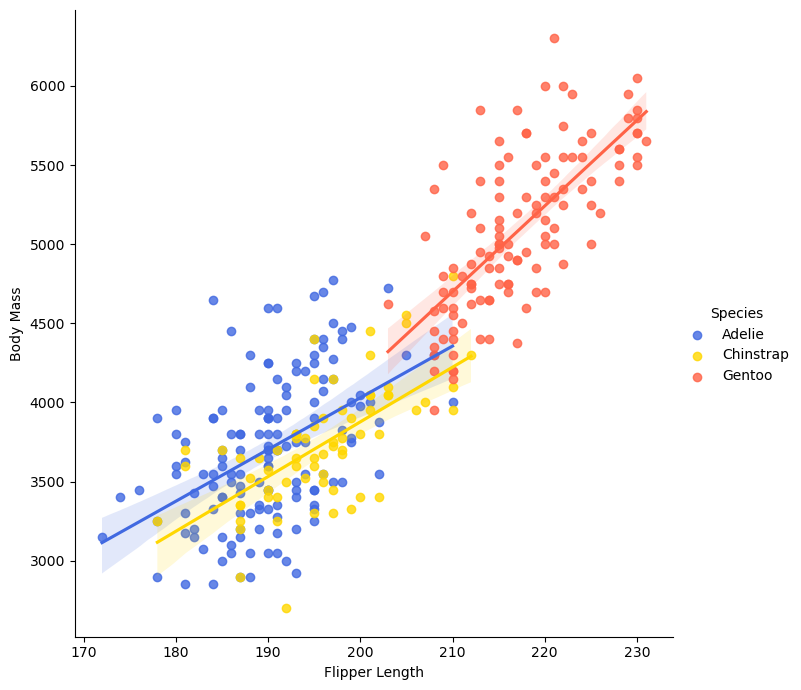

In [303]:
body_per_flipper = sns.lmplot(x="Flipper Length (mm)",
               y="Body Mass (g)",
               hue="Species",
               height=7,
               data=df,
               palette=['royalblue','gold','tomato'])
body_per_flipper.set_xlabels('Flipper Length')
body_per_flipper.set_ylabels('Body Mass')

#Species	Island	Bill Length (mm)	Bill Depth (mm)	Flipper Length (mm)	Body Mass (g)	Sex

## 3d Visualisation Dependency between Body Mass, Flipper Length and Bill Length

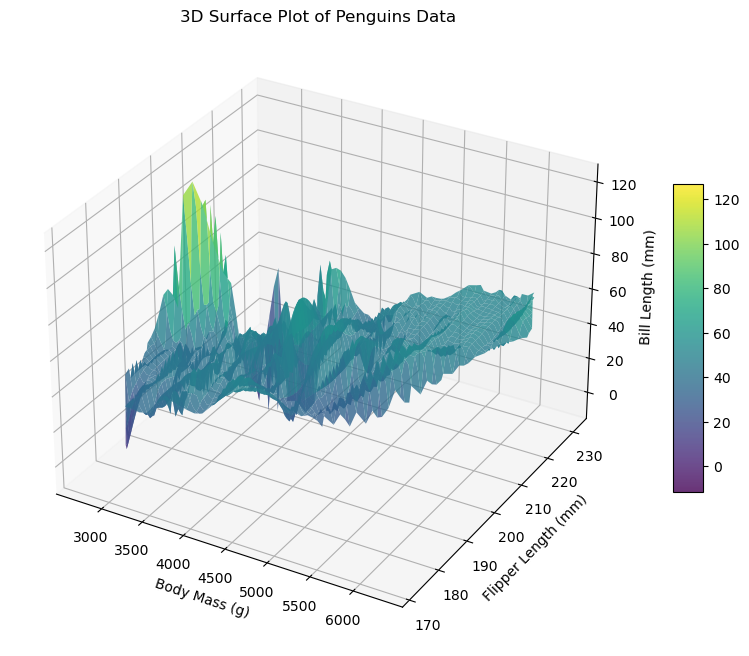

In [307]:
# Setting up the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Grids for interpolation
x = np.linspace(df['Body Mass (g)'].min(), df['Body Mass (g)'].max(), num=100)
y = np.linspace(df['Flipper Length (mm)'].min(), df['Flipper Length (mm)'].max(), num=100)
x, y = np.meshgrid(x, y)

# Interpolate z values on this grid
z = griddata((df['Body Mass (g)'], df['Flipper Length (mm)']), df['Bill Length (mm)'], (x, y), method='cubic')

# Surface plot
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.8)

# Labels
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.set_zlabel('Bill Length (mm)')

# Color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Title
ax.set_title('3D Surface Plot of Penguins Data')

plt.show()

## Body Mass vs Flipper Length (Polynomial Regression)
***

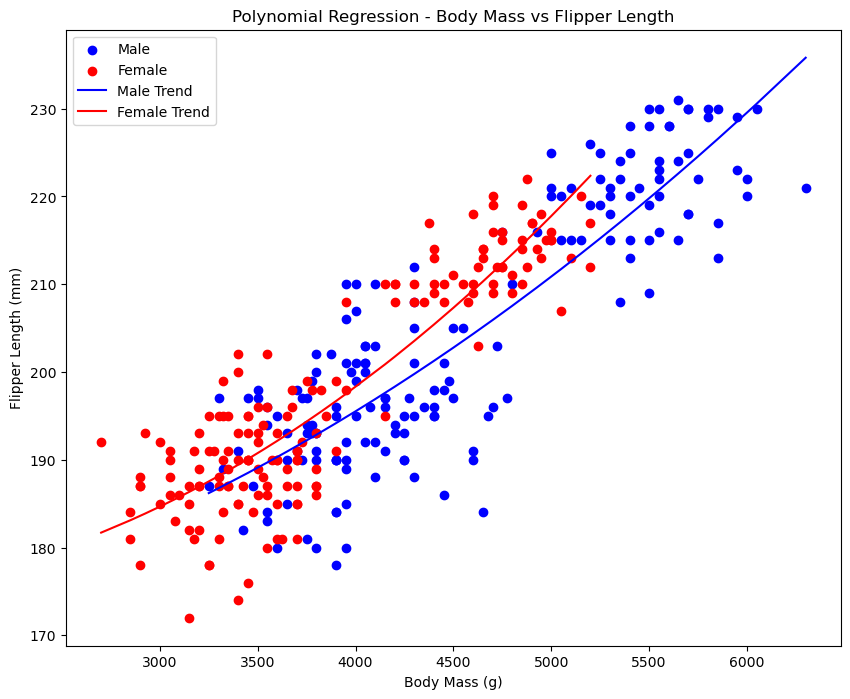

In [304]:
# Separating males and females
male = df[df['Sex'] == 'MALE']
female = df[df['Sex'] == 'FEMALE']

# Polynomial Regression function
def plot_polynomial_regression(x, y, ax, color, gender):
    # Reshaping and transforming the data for polynomial regression
    x_reshaped = x.values.reshape(-1, 1)
    y_reshaped = y.values.reshape(-1, 1)
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x_reshaped)

    # Regression model
    model = LinearRegression()
    model.fit(x_poly, y_reshaped)
    y_poly_pred = model.predict(x_poly)

    # Sorting the values for plotting
    sorted_zip = sorted(zip(x_reshaped, y_poly_pred))
    x_poly, y_poly_pred = zip(*sorted_zip)
    ax.plot(x_poly, y_poly_pred, color=color, label=f'{gender} Trend')

# Plotting format
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(male['Body Mass (g)'], male['Flipper Length (mm)'], color='blue', label='Male')
ax.scatter(female['Body Mass (g)'], female['Flipper Length (mm)'], color='red', label='Female')

plot_polynomial_regression(male['Body Mass (g)'], male['Flipper Length (mm)'], ax, 'blue', 'Male')
plot_polynomial_regression(female['Body Mass (g)'], female['Flipper Length (mm)'], ax, 'red', 'Female')

ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.set_title('Polynomial Regression - Body Mass vs Flipper Length')
ax.legend()

# Show
plt.show()

## Correlation Heatmap
***

<Axes: >

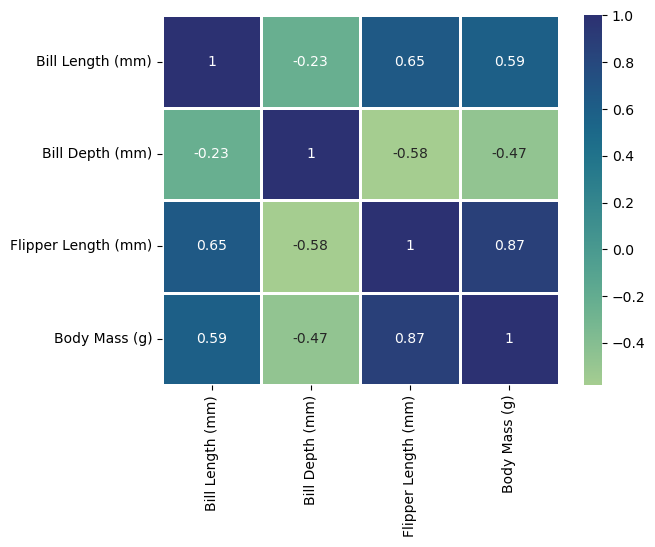

In [305]:
# Develop Heatmap
correlation_hitmaps = df[['Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]

correlation_matrix = correlation_hitmaps.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidth=1)

# End
***